In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [292]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [293]:
df = pd.read_excel("/content/drive/MyDrive/alpha-bank/Training.xlsb", engine='pyxlsb')

df

,ID,A,B,C,D,E,F,G,H,I,...,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89729,89730,0.027941,0.014844,25.00,474.00,0.557647,0.296250,20,0.01,Man,...,0 Zero,property,No,Works,Yes,Yes,No,No,Yes,0
89730,89731,0.120017,0.068581,179.96,720.03,1.200050,0.685743,10,0.00,Woman,...,2 Two,property,No,Works,Yes,Yes,No,No,Yes,0
89731,89732,0.153033,0.122427,29.01,550.99,0.459158,0.367327,3,0.00,Man,...,0 Zero,otherwise,No,Works,Yes,Yes,No,Yes,Yes,0
89732,89733,0.107575,0.043030,53.82,215.18,0.537950,0.215180,5,0.00,Woman,...,1 One,property,Yes,Works,No,Yes,No,No,Yes,0


#DQC

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U       89734 non-null  object 
 22

Нулевых значений нет

Проверим на дупликаты

In [295]:
df_d=df.copy()
df_d.drop_duplicates(subset=None, inplace=True)

In [296]:
print(df_d.shape)
print(df.shape)

(89734, 26)
(89734, 26)


Дупликатов нет

Как мы можем видеть 11 численных признаков и 14 категориальных

In [297]:
cat_feature=['I','K', 'M','N','O','P','Q', 'R', 'S', 'T','U', 'V','W','X']
df[cat_feature]

,I,K,M,N,O,P,Q,R,S,T,U,V,W,X
0,Woman,Mogilev region,NE employee,Secondary education (plus special education),Married,2 Two,property,No,Works,Yes,Yes,No,Yes,No
1,Woman,Minsk region,NE employee,Secondary education (plus special education),Married,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No
2,Woman,Vitebsk region,NE employee,Secondary education (plus special education),Divorced/widow,1 One,property,No,No couple,No,Yes,No,Yes,No
3,Woman,Minsk region,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No
4,Woman,Brest region,NE employee,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89729,Man,Minsk region,Head/Deputy head (division),Secondary education (plus special education),Married,0 Zero,property,No,Works,Yes,Yes,No,No,Yes
89730,Woman,Minsk,NE employee,Higher education (one or more),Married,2 Two,property,No,Works,Yes,Yes,No,No,Yes
89731,Man,Minsk,NE employee,Higher education (one or more),Married,0 Zero,otherwise,No,Works,Yes,Yes,No,Yes,Yes
89732,Woman,Minsk,NE employee,Higher education (one or more),Married,1 One,property,Yes,Works,No,Yes,No,No,Yes


Почти все эти признаки можно отнести к категориальным, однако признак P может оказаться не просто категориями, а ранжированием.

In [298]:
num_feature=['A','B','C','D','E','F','G','H','J','L']
df[num_feature]

,A,B,C,D,E,F,G,H,J,L
0,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,33.750000,132
1,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,33.250000,6
2,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,38.583333,71
3,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,61.250000,48
4,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,48.583333,48
...,...,...,...,...,...,...,...,...,...,...
89729,0.027941,0.014844,25.00,474.00,0.557647,0.296250,20,0.01,26.833333,14
89730,0.120017,0.068581,179.96,720.03,1.200050,0.685743,10,0.00,44.583333,48
89731,0.153033,0.122427,29.01,550.99,0.459158,0.367327,3,0.00,61.250000,288
89732,0.107575,0.043030,53.82,215.18,0.537950,0.215180,5,0.00,28.833333,30


#EDA

In [299]:
df['MARKER'].value_counts()

0    89392
1      342
Name: MARKER, dtype: int64

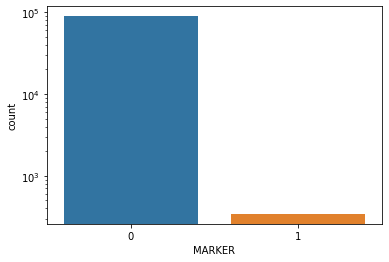

In [300]:
ax=sns.countplot(x='MARKER',data=df);
ax.set_yscale('log')

У нас 342 данных относящихся к классу '1' и 89392 относящихся к классу '0'

Это означает, что у нас несбалансированные данные.

<ipython-input-301-9822c8c6a007>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



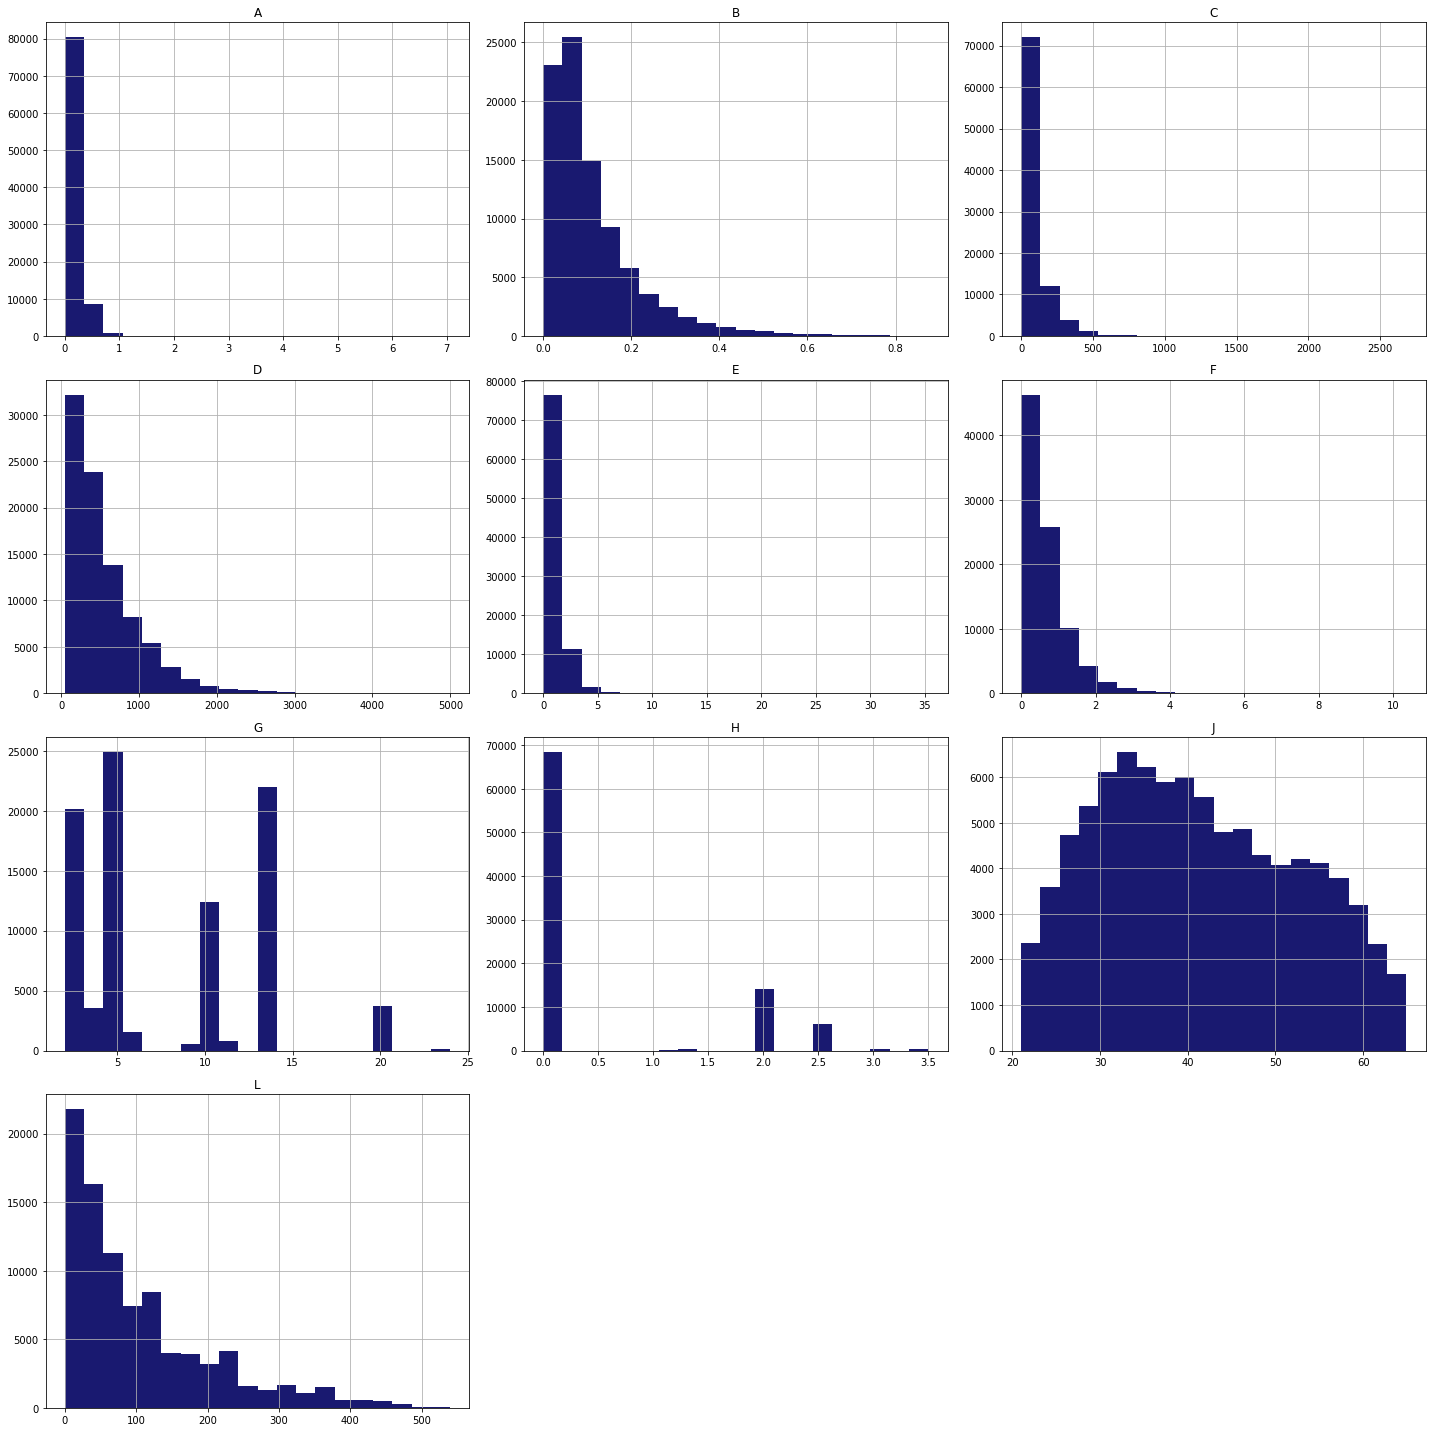

In [301]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(num_feature):
  ax=fig.add_subplot(3,4,i+1)
  df[num_feature].hist(bins=20,ax=ax,facecolor='midnightblue')
  ax.set_title(feature+" Distribution",color='DarkRed')
  ax.set_yscale('log')
fig.tight_layout()  
plt.show()

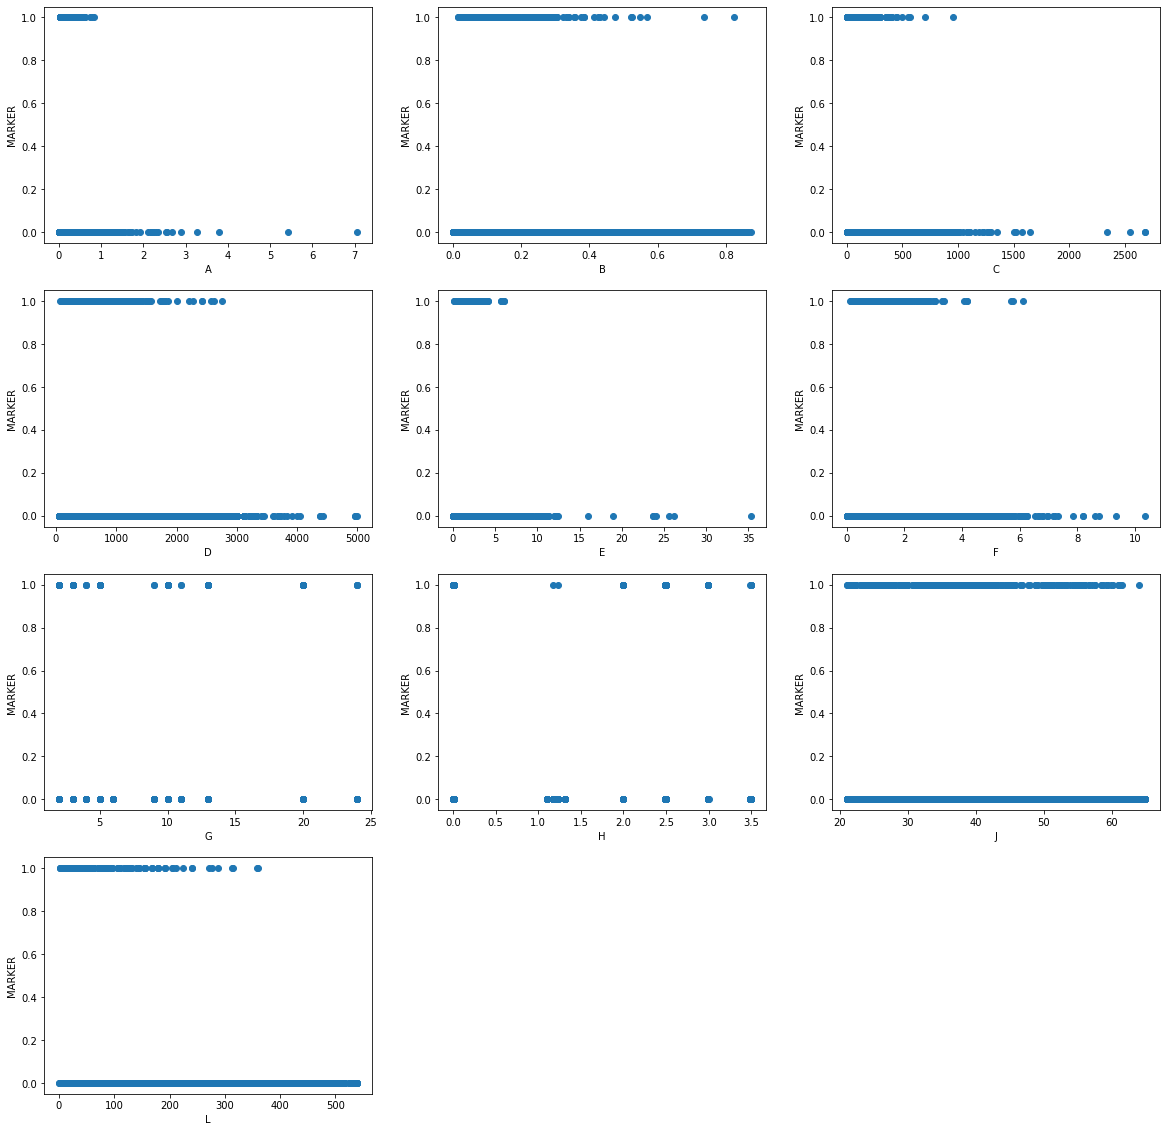

In [302]:
plt.figure(figsize=(20, 20))
for numb,i in enumerate(num_feature): 
  plt.subplot(4,3,numb+1)
  plt.scatter(df[i], df['MARKER'])
  plt.xlabel(i)
  plt.ylabel('MARKER')

In [303]:
df.describe(percentiles=[.25,.50,.75,.90,.95,.96,.97,.98,.99,.995])

,ID,A,B,C,D,E,F,G,H,J,L,MARKER
count,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000
mean,44867.500000,0.167863,0.113511,85.801266,548.507954,1.011455,0.683640,7.854358,0.510274,41.140778,103.719092,0.003811
std,25904.118865,0.153851,0.105340,105.366771,448.686233,0.910583,0.622047,4.754588,0.928146,11.129976,100.458022,0.061618
min,1.000000,0.000002,0.000001,0.000000,49.980000,0.000016,0.000012,2.000000,0.000000,21.000000,0.000000,0.000000
25%,22434.250000,0.065843,0.042922,20.570000,227.030000,0.405983,0.263775,4.000000,0.000000,32.083333,29.000000,0.000000
50%,44867.500000,0.119133,0.079733,50.020000,408.735000,0.749403,0.499387,5.000000,0.000000,40.000000,69.000000,0.000000
75%,67300.750000,0.220000,0.146990,108.930000,746.710000,1.333367,0.899260,13.000000,0.010000,50.000000,144.000000,0.000000
90%,80760.700000,0.361042,0.245553,213.770000,1139.030000,2.089960,1.440225,13.000000,1.990000,57.250000,247.000000,0.000000
95%,85247.350000,0.468460,0.325408,297.470000,1425.000000,2.700075,1.871499,13.000000,2.490000,60.166667,324.000000,0.000000
96%,86144.680000,0.501850,0.352348,314.970000,1520.000000,2.897215,2.002223,20.000000,2.490000,60.916667,348.000000,0.000000


Видим, что в некоторых данных присутствуют выбросы, так максимальные значения сильно превышают значения на 99.5 процентах выборки.

Исходя из графиков можно заметить, что большая часть выбросов не принадлежит к классу 1, что значит мы можем отбросить эту часть без какой-либо потери качества.

По графикам можно видеть, что какой-то конкретной зависимости между признаками и целевой переменной не прослеживается
 

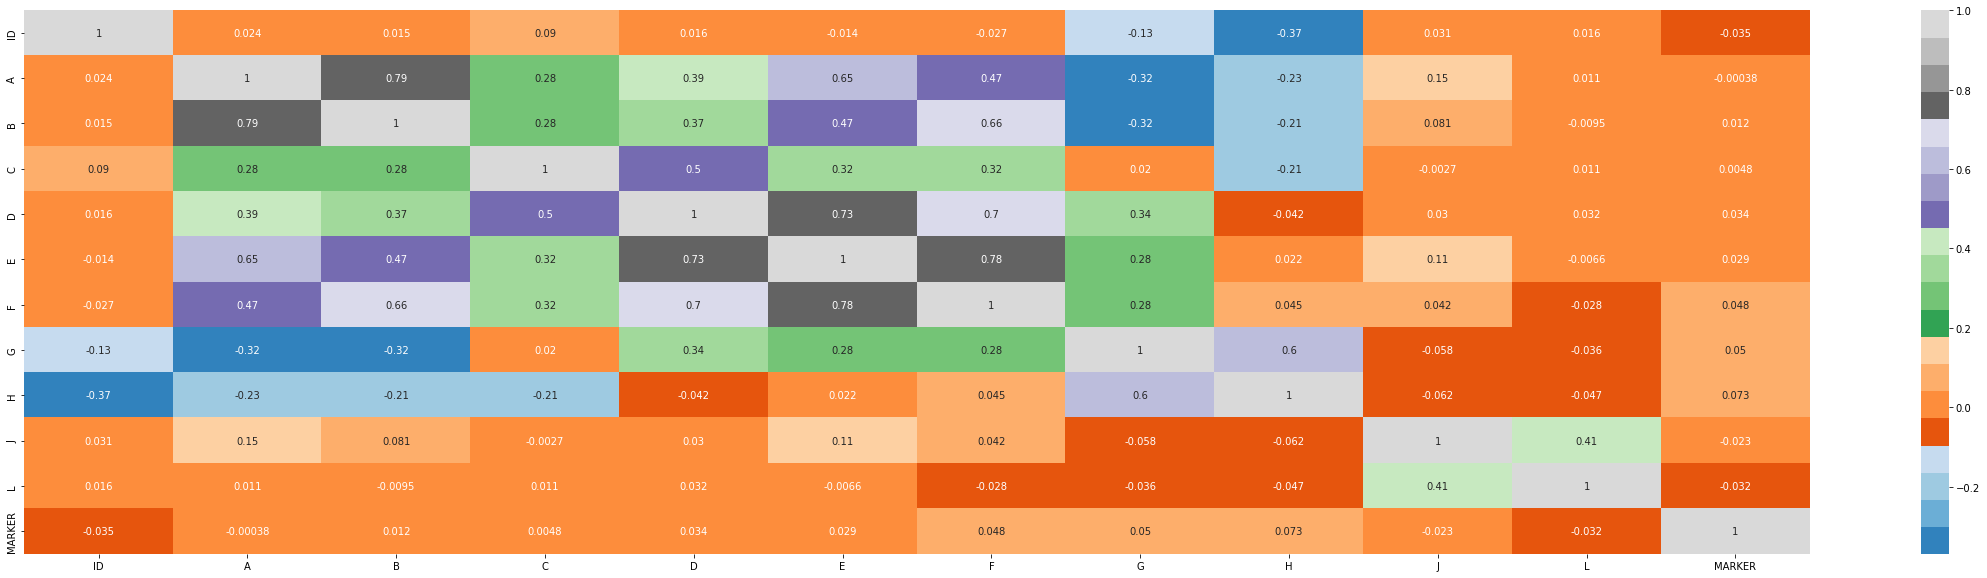

In [304]:
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

По корреляционной матрице становится понятно, что признаки не сильно коррелируют с целевой переменной

Посмотрим распределение категориальных признаков на всем датасете:

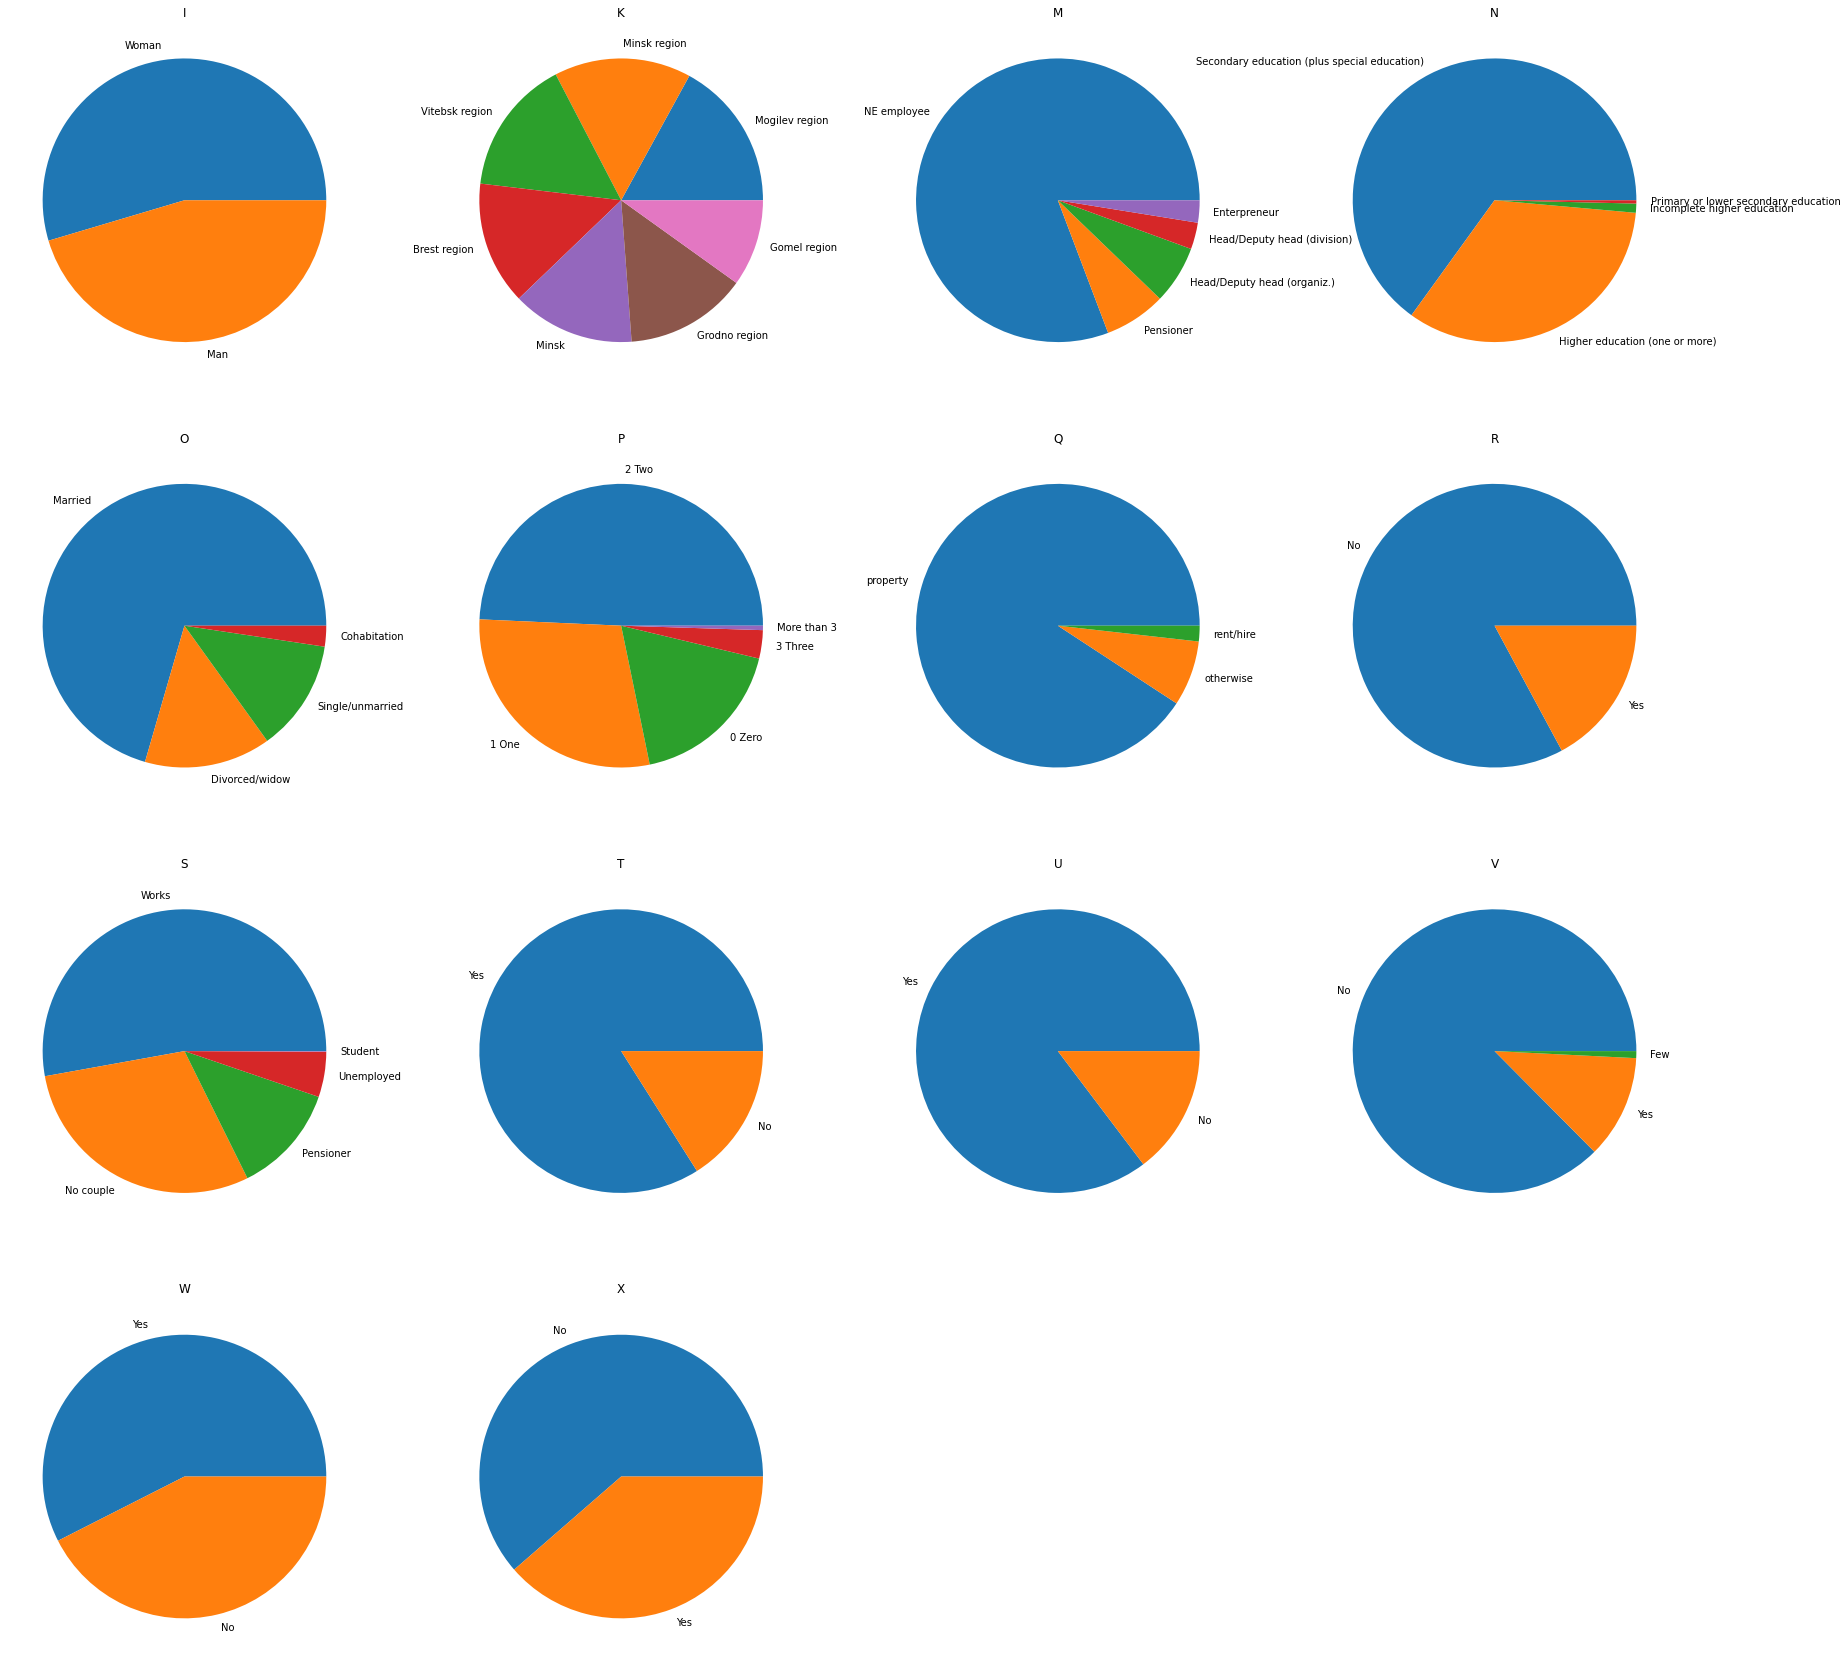

In [305]:
plt.subplots(3,4,figsize=(30,30))
for numb,i in enumerate(cat_feature):
  b = df[i].value_counts()
  plt.subplot(4,4, numb+1)
  plt.pie(b.values,labels=df[i].unique())
  plt.title(i)

Теперь посмотрим распределение признаков, которые относятся к классу 1

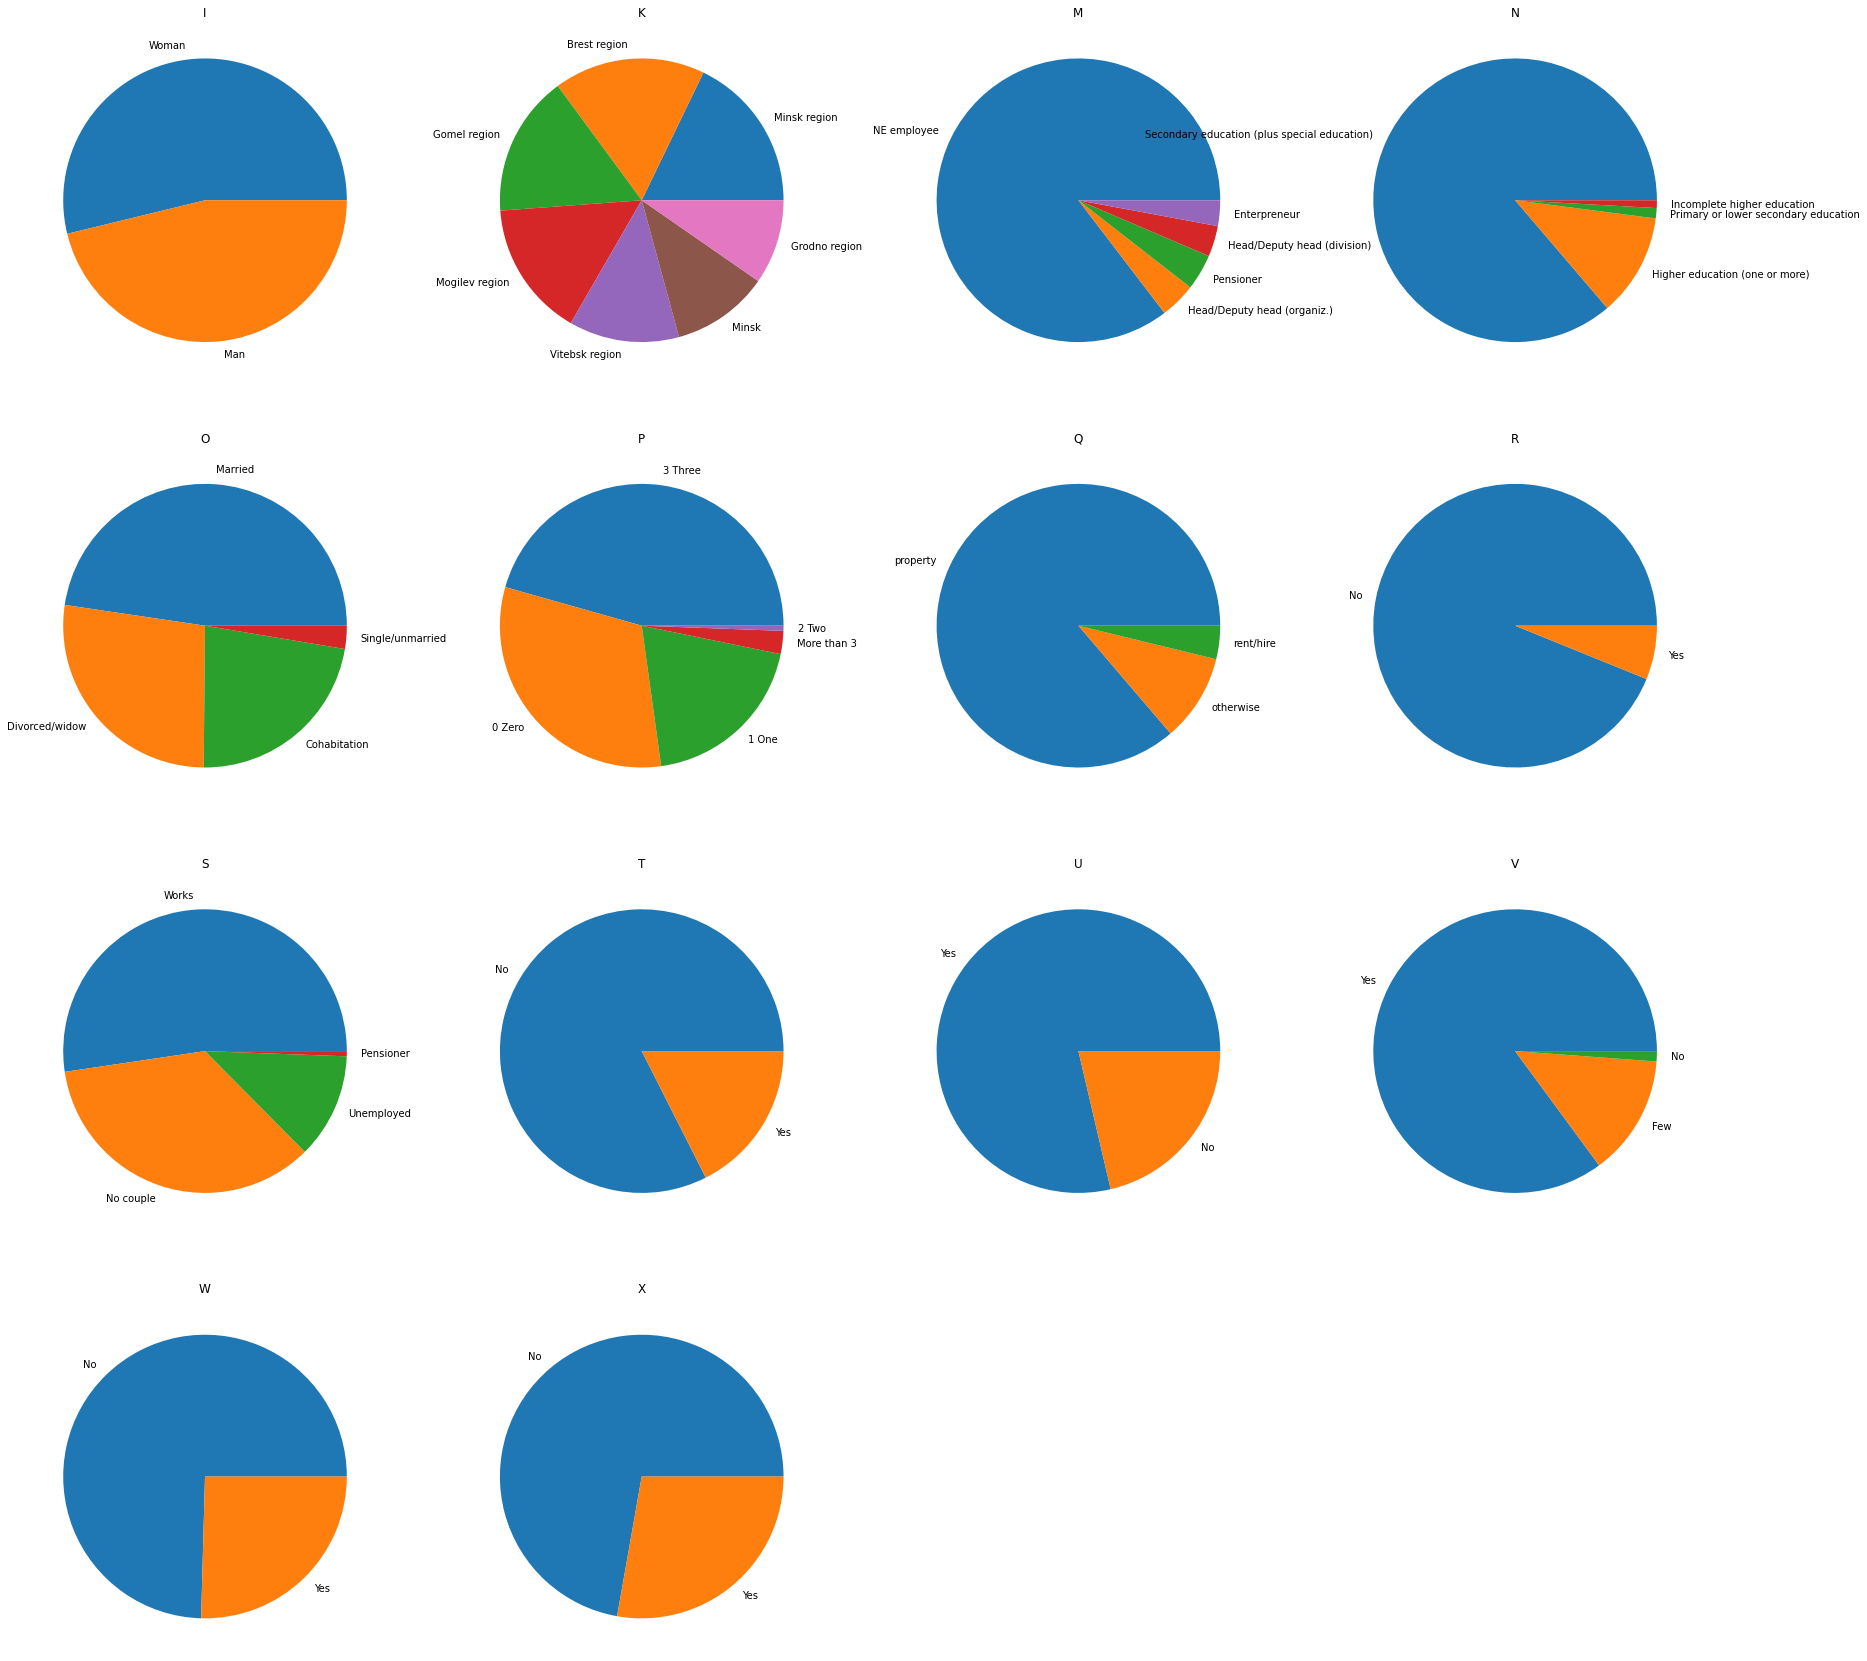

In [306]:
plt.subplots(3,4,figsize=(30,30))
for numb,i in enumerate(cat_feature):
  b = df[i][df['MARKER']==1].value_counts()
  plt.subplot(4,4, numb+1)
  plt.pie(b.values,labels=df[i][df['MARKER']==1].unique())
  plt.title(i)

Исходя из этих двух распределений, можно заметить, что доминирующие классы отличаются для некоторых признаков.
Например 'P', 'T', 'V', 'W'

Очистим данные от выбросов



In [307]:
df = df[df.A <=1]
df=df[df.C<=1500]
df=df[df.D<=4000]
df = df[df.E <=15]
df=df[df.F<=7]


#обучение

Так как данные несбалансированные,надо произвести стратифицированный сплиттинг

In [308]:
from sklearn.model_selection import train_test_split
y=df['MARKER']
X=df.drop('MARKER',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21,
                                                    stratify=y, 
                                                    test_size=0.2,)


In [309]:
print(y_train.value_counts())
print('процент класса 1 от всех элементов в тренировочной выборке ',100*y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts())

print('процент класса 1 от всех элементов в тестовой выборке ',100*y_test.value_counts()[1]/y_test.value_counts()[0])



0    71386
1      274
Name: MARKER, dtype: int64
процент класса 1 от всех элементов в тренировочной выборке  0.3838287619421175
0    17848
1       68
Name: MARKER, dtype: int64
процент класса 1 от всех элементов в тестовой выборке  0.3809950694755715


Видим что соотношение класса '1' сохранилось как для тестовой так и для тренировочной выборок

In [310]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_feature),
    ('scaling', MinMaxScaler(), num_feature)
])

X_train_scale=column_transformer.fit_transform(X_train)
X_test_scale=column_transformer.fit_transform(X_test)
X_test_scale.shape

# model=LogisticRegression(class_weight='balanced',random_state=21,max_iter=1000, C=0.1).fit(X_train_scale,y_train)
model=LogisticRegression(solver='liblinear',class_weight='balanced',random_state=21,max_iter=1000, C=0.1,penalty='l1').fit(X_train_scale,y_train)

In [311]:
model.coef_

array([[ 0.        , -0.28201   ,  0.02270453,  0.06291576, -0.1726911 ,
        -0.33611088,  0.        , -0.05210726, -0.32440237,  0.38175575,
        -0.07779162,  0.44039048, -0.52476059, -0.30843378, -0.20748061,
         0.        ,  0.        ,  1.23599953, -0.08803682,  0.16770505,
        -0.81852028,  0.        , -0.28028102,  0.        ,  0.3185166 ,
        -0.61614353, -0.28323244, -0.0631987 , -0.38398816,  0.38178187,
         0.        , -0.72195232,  0.        , -1.14582691,  0.        ,
         0.        ,  0.01149557,  0.        , -0.06306906,  0.        ,
        -0.30148496,  0.        , -0.07244211,  0.        ,  0.        ,
        -0.55793726,  0.        , -0.38232084,  2.20539981,  0.        ,
         0.        ,  3.83657219, -1.12211619,  1.66348837,  1.06108059,
         3.18416634, -0.25994867, -3.34300712]])

Видим, что l1 регуляризация зануляет признаки которые не сильно влияют на результат. Это для нас полезно, тк у нас много признаков, которые не коррелирируют с целевой переменной

In [312]:
y_pred=model.predict(X_test_scale)

In [313]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     17848
           1       0.01      0.82      0.03        68

    accuracy                           0.79     17916
   macro avg       0.51      0.81      0.45     17916
weighted avg       1.00      0.79      0.88     17916



Заметим, что точность для 1 очень маленькая

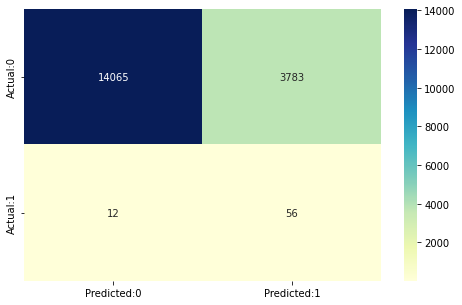

In [314]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

В принципе, хороший показатель, если для нас важнее предсказать количество единиц правильно, чем количество 0 неправильно.

Попробуем сами установить трешхолды по которым мы будем определять к какому классу отнести элемент

In [315]:
y_pred_prob=model.predict_proba(X_test_scale)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of (0)','Prob of (1)'])
y_pred_prob_df.head(5)

,Prob of (0),Prob of (1)
0,0.399814,0.600186
1,0.299743,0.700257
2,0.980753,0.019247
3,0.837762,0.162238
4,0.141939,0.858061


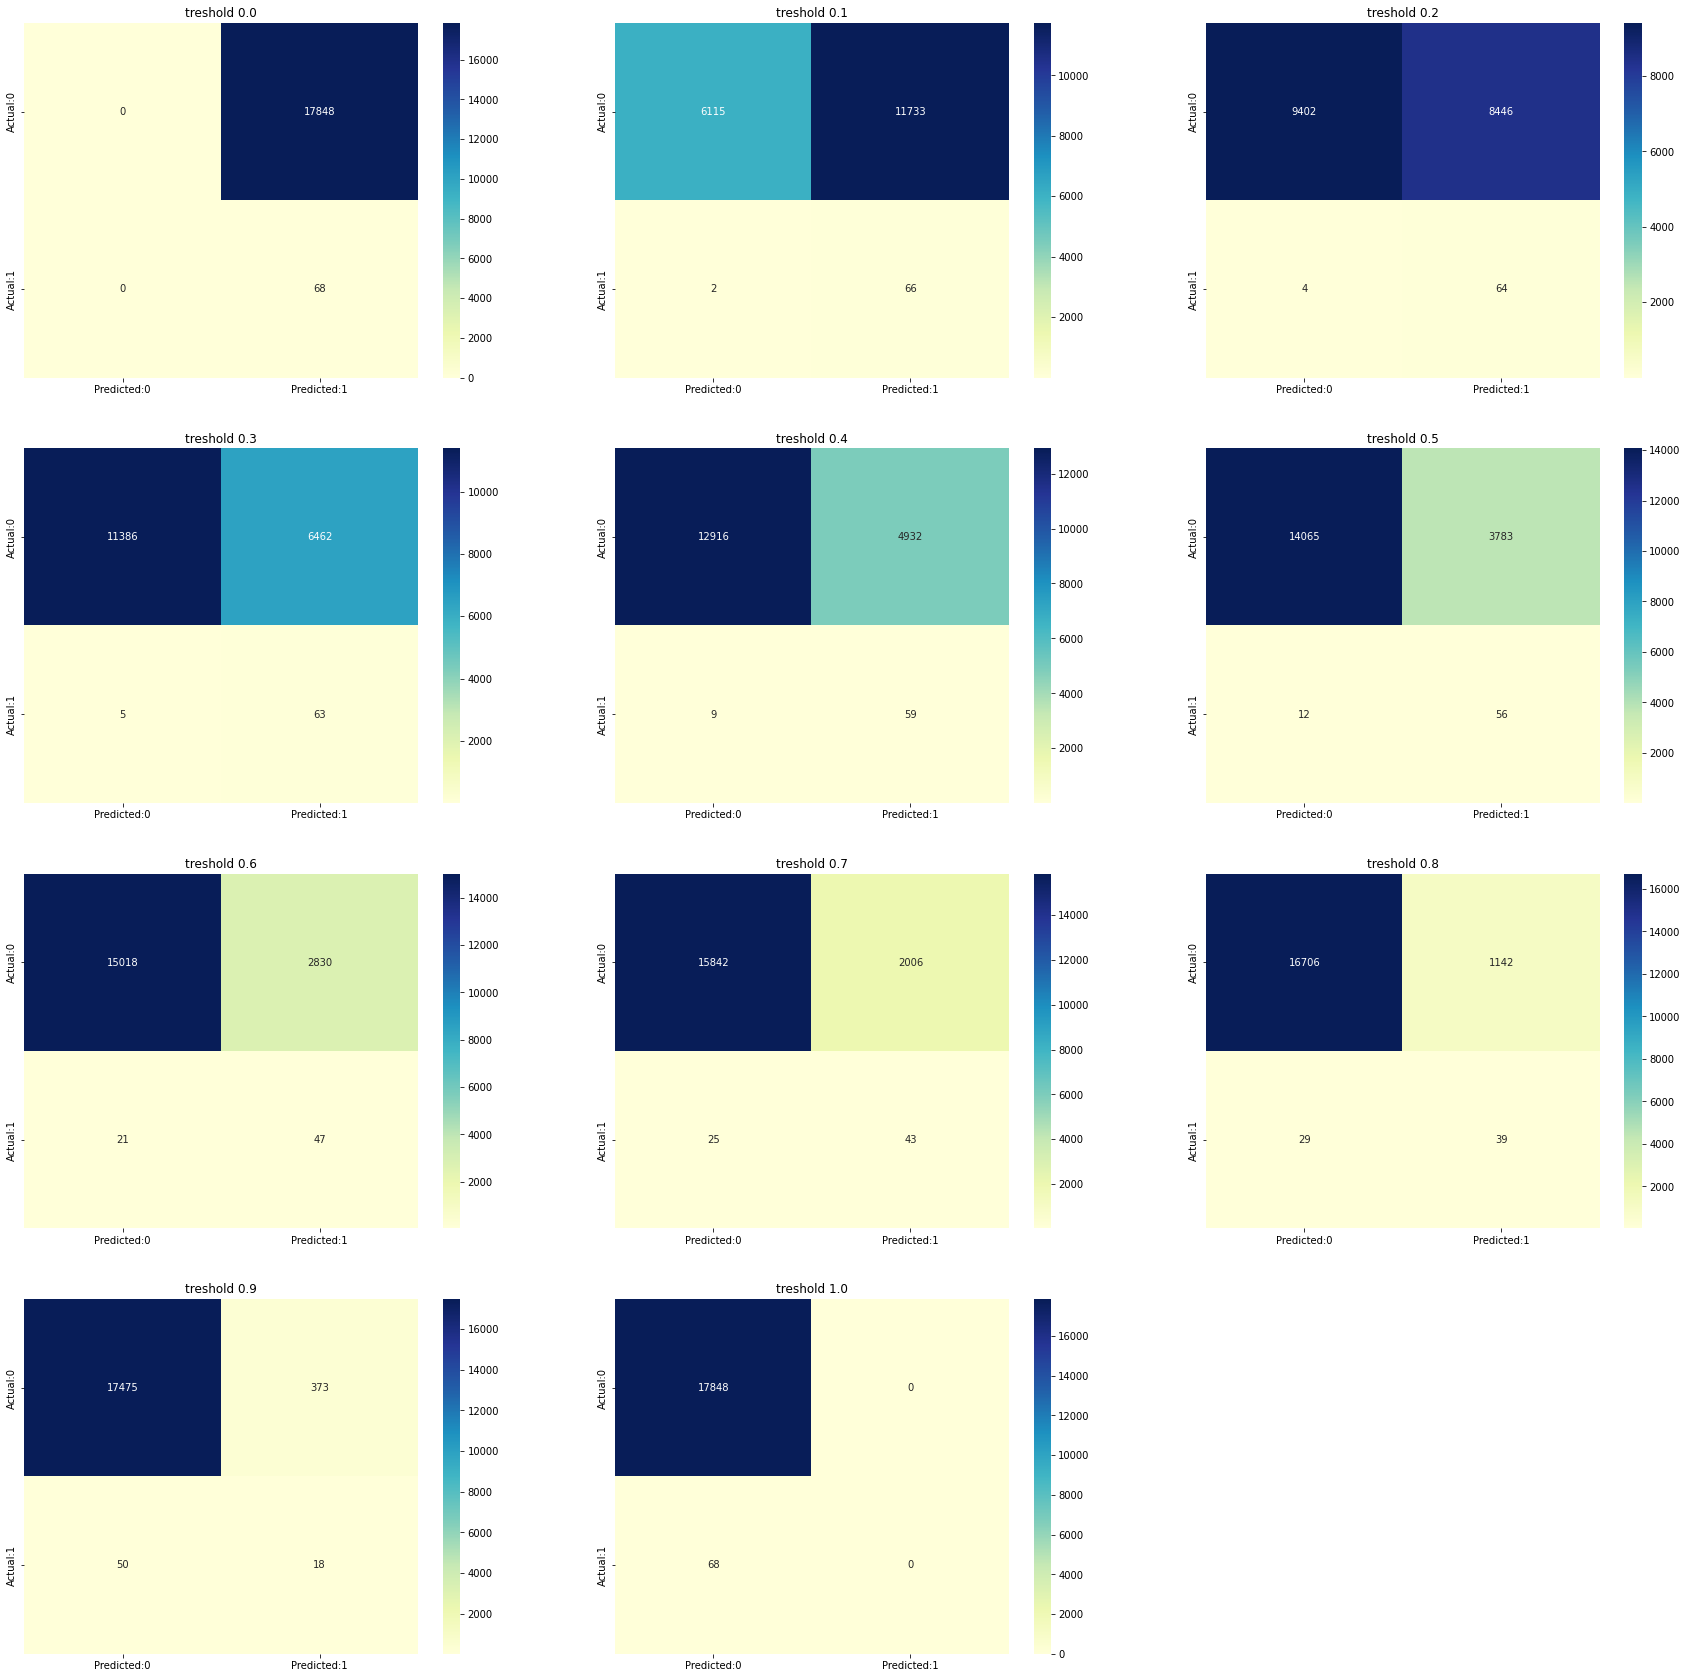

In [316]:
from sklearn.preprocessing import binarize
plt.figure(figsize = (30,30))
y_pred_prob_yes=model.predict_proba(X_test_scale)
for i in range(0,11):
    cm2=0
    y_pred2=binarize(y_pred_prob_yes,threshold=i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    conf_matrix=pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.subplot(4,3,i+1)
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.title('treshold '+str(i/10))

Заметим, что чем меньше мы хотим ошибаться для 1 тем больше ошибаемся для 0. Для этого построим ROC curve которая и показывает эту зависимость

In [317]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test_scale)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
fig = px.scatter(
    x=fpr, y=tpr, color = thresholds,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate', color = 'Threshold'))
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [318]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8769939620850581

In [319]:
print(classification_report(y_test,binarize(y_pred_prob_yes,threshold=0.8)[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17848
           1       0.03      0.57      0.06        68

    accuracy                           0.93     17916
   macro avg       0.52      0.75      0.51     17916
weighted avg       0.99      0.93      0.96     17916



#Попробуем доопределить класс которого меньше, а именно класс 1, с помощью оверсемплинга

Так как у нас очень мало данных из класса 1 попробуем доопределить этот класс

In [320]:
from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(df,random_state=21,stratify=df['MARKER'],test_size=0.2)
msk = df_train['MARKER'] == 1
num_to_oversample = len(df_train) - 2*msk.sum()
df_positive_oversample = df_train[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df_train, df_positive_oversample])
df_train_oversample['MARKER'].value_counts()


0    71386
1    71386
Name: MARKER, dtype: int64

In [321]:

y_train_oversample=df_train_oversample['MARKER']
X_train_oversample=df_train_oversample.drop('MARKER',axis=1)
y_test_oversample=df_test['MARKER']
X_test_oversample=df_test.drop('MARKER',axis=1)

X_train_oversample_scale=column_transformer.fit_transform(X_train_oversample)
X_test_oversample_scale=column_transformer.fit_transform(X_test_oversample)

model_oversample=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=21,C=0.1).fit(X_train_oversample_scale,y_train_oversample)

In [322]:
y_pred_oversample=model_oversample.predict(X_test_oversample_scale)

In [323]:
print(y_pred_oversample.shape)


(17916,)


In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_test_oversample,y_pred_oversample))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     17848
           1       0.01      0.82      0.03        68

    accuracy                           0.79     17916
   macro avg       0.51      0.81      0.46     17916
weighted avg       1.00      0.79      0.88     17916



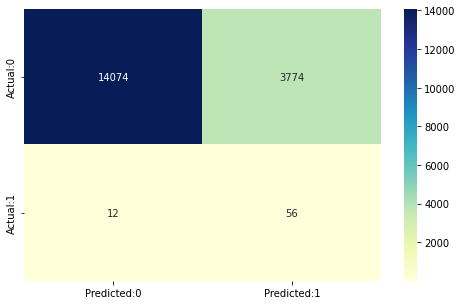

In [325]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_oversample,y_pred_oversample)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [326]:
y_pred_prob_over=model_oversample.predict_proba(X_test_oversample_scale)[:,:]
y_pred_prob_df_oversample=pd.DataFrame(data=y_pred_prob_over, columns=['Prob of (0)','Prob of (1)'])
y_pred_prob_df_oversample.head(5)

,Prob of (0),Prob of (1)
0,0.402071,0.597929
1,0.310860,0.689140
2,0.979171,0.020829
3,0.833266,0.166734
4,0.133323,0.866677


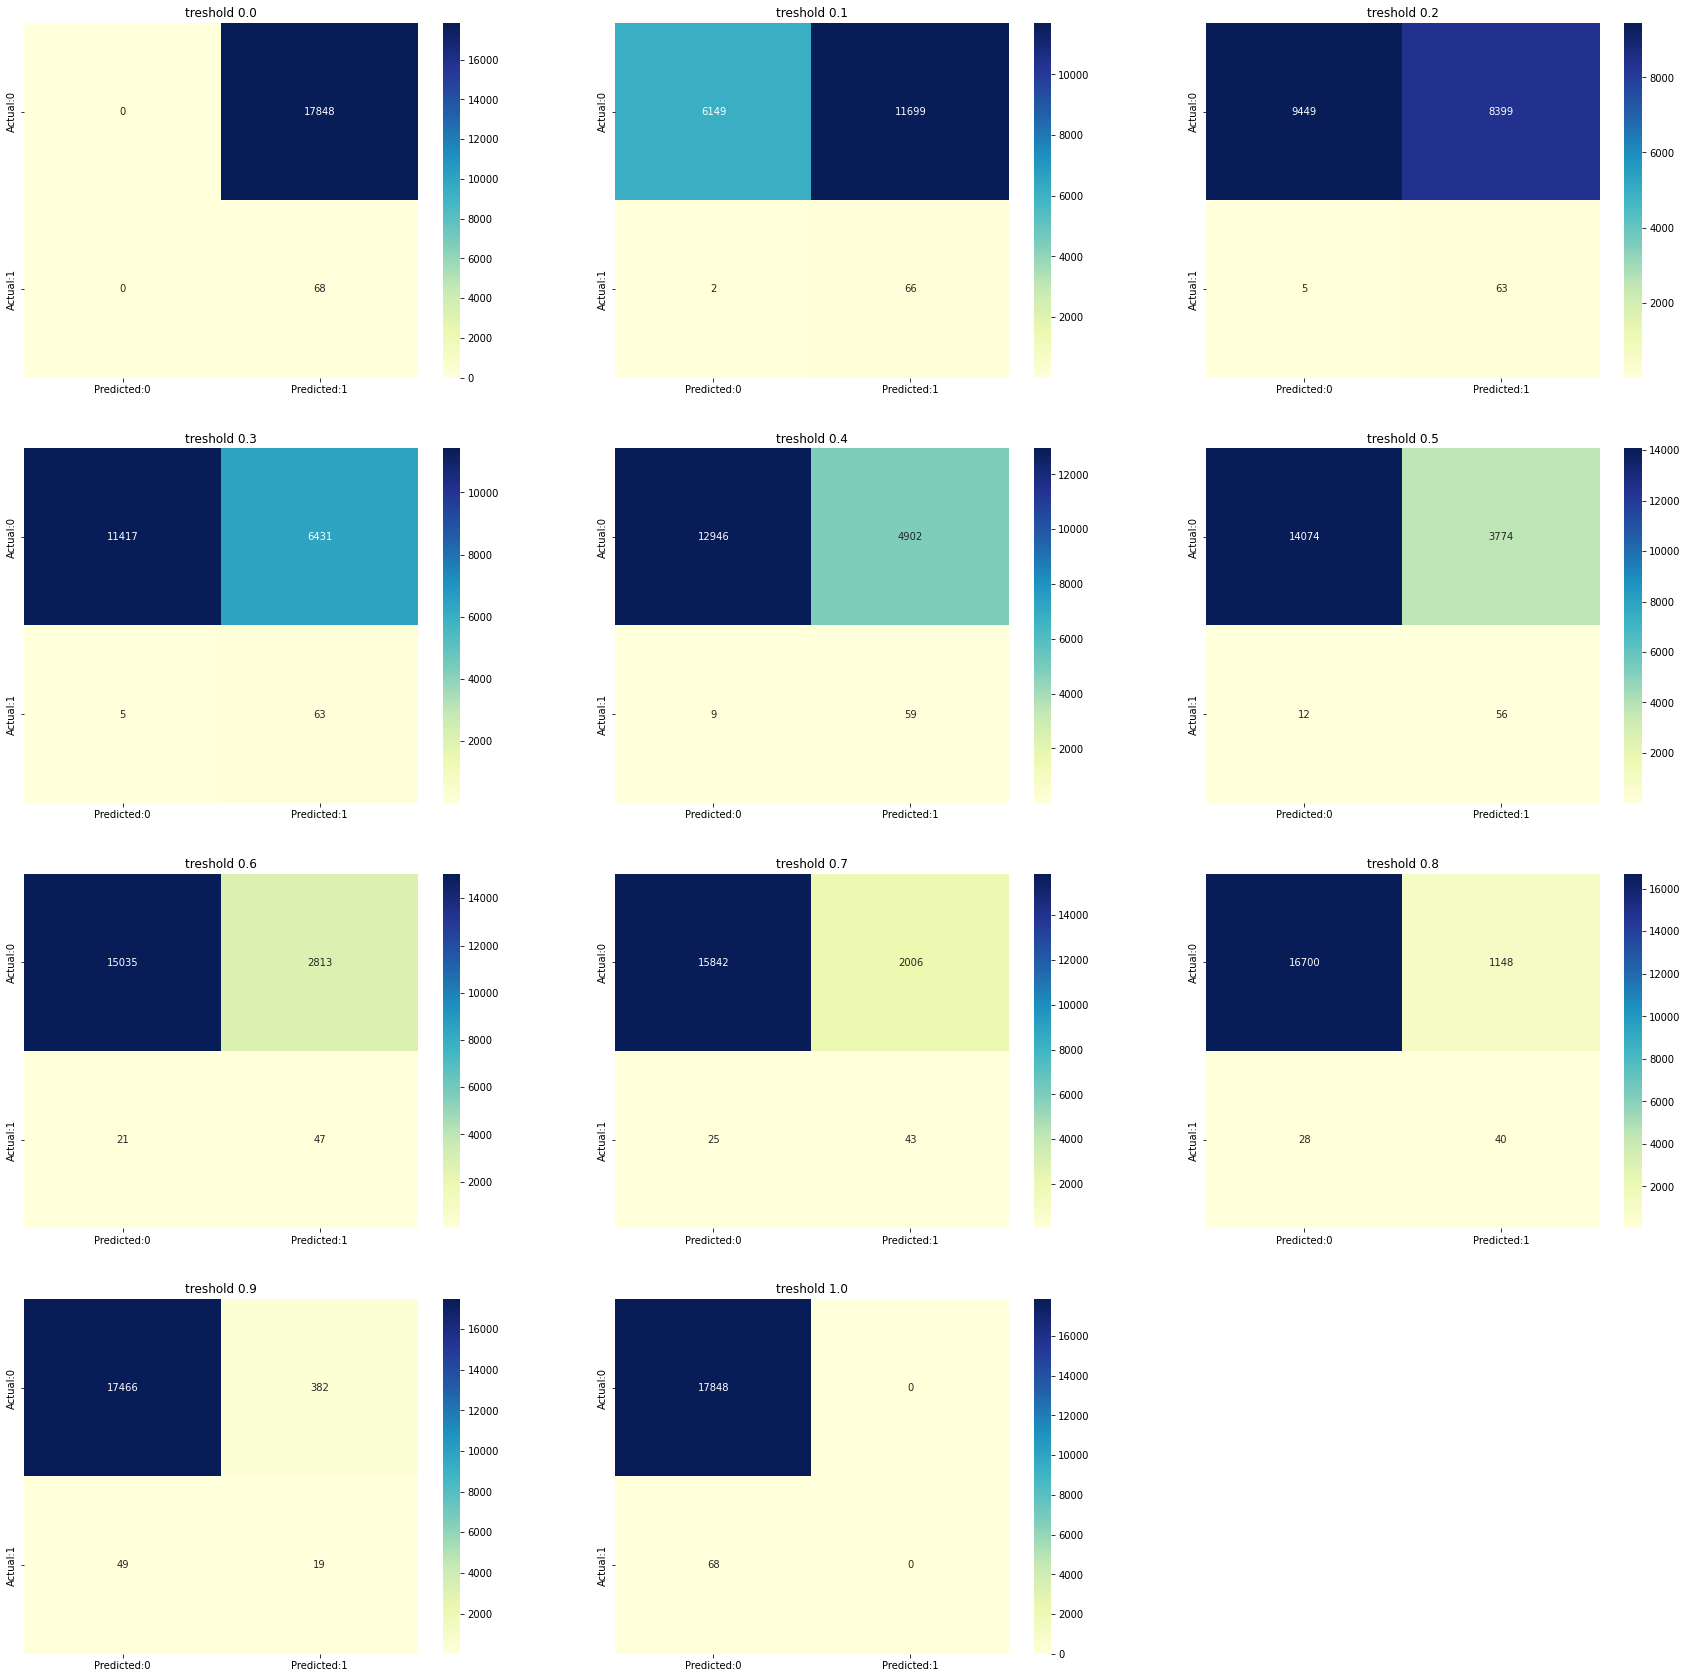

In [327]:
from sklearn.preprocessing import binarize
plt.figure(figsize = (30,30))
y_pred_prob_yes_over=model_oversample.predict_proba(X_test_oversample_scale)
for i in range(0,11):
    cm2=0
    y_pred2=binarize(y_pred_prob_yes_over,threshold=i/10)[:,1]
    cm2=confusion_matrix(y_test_oversample,y_pred2)
    conf_matrix=pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.subplot(4,3,i+1)
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.title('treshold '+str(i/10))

In [328]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
y_score_oversample = model_oversample.predict_proba(X_test_oversample_scale)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_oversample, y_score_oversample)
fig = px.scatter(
    x=fpr, y=tpr, color = thresholds,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate', color = 'Threshold'))
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [329]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_oversample,y_pred_prob_yes_over[:,1])

0.8751779734753605

In [330]:
print(classification_report(y_test_oversample,binarize(y_pred_prob_yes_over,threshold=0.8)[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17848
           1       0.03      0.59      0.06        68

    accuracy                           0.93     17916
   macro avg       0.52      0.76      0.51     17916
weighted avg       0.99      0.93      0.96     17916



#Выводы

Без оверсемплинга

In [331]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test_scale)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
fig = px.scatter(
    x=fpr, y=tpr, color = thresholds,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate', color = 'Threshold'))
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [332]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8769939620850581

In [333]:
print(classification_report(y_test,binarize(y_pred_prob_yes,threshold=0.8)[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17848
           1       0.03      0.57      0.06        68

    accuracy                           0.93     17916
   macro avg       0.52      0.75      0.51     17916
weighted avg       0.99      0.93      0.96     17916



Для оверсемплинга

In [334]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
y_score_oversample = model_oversample.predict_proba(X_test_oversample_scale)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_oversample, y_score_oversample)
fig = px.scatter(
    x=fpr, y=tpr, color = thresholds,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate', color = 'Threshold'))
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [335]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_oversample,y_pred_prob_yes_over[:,1])

0.8751779734753605

In [336]:
print(classification_report(y_test_oversample,binarize(y_pred_prob_yes_over,threshold=0.8)[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17848
           1       0.03      0.59      0.06        68

    accuracy                           0.93     17916
   macro avg       0.52      0.76      0.51     17916
weighted avg       0.99      0.93      0.96     17916



Заметим, что качество на тестовой выборке для оверсемплинга не увеличилось. Для улучшения качества лучше иметь побольше данных относящихся к классу 1, либо описание признаков, которые помогут их отобрать вручную. Также можно использовать более глубокие модели, которые смогут находить более сильные зависимости. Пока что с логистической регрессией хорошие результаты получить сложно, однако каким-то образом разделять два класса всё же получается. Если для нас важнее определять 1 чем ошибиться с 0, то можно поставить трешхолд немного пониже.